# equalizationAndSegmentation - computer vision
- Sara Echeverría 21371
- Melissa Pérez 21385
- Ricardo Mendez 21289


repository link: https://github.com/bl33h/equalizationAndSegmentation

## Task 1
Function to perform histogram equalization on an 8-bit grayscale image.

In [1]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

In [2]:
def histogramEqualization(image):
    # compute histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # compute cumulative distribution function (cdf)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()  # normalize for visualization
    
    # normalize cdf to scale between 0 and 255
    cdf_min = cdf.min()
    cdf_mapped = (cdf - cdf_min) * 255 / (cdf.max() - cdf_min)
    cdf_mapped = np.ma.filled(cdf_mapped, 0).astype(np.uint8)  # handle zeros
    
    # map the pixels of the original image using the equalized cdf
    equalizedImg = cdf_mapped[image]
    
    return equalizedImg, cdf_normalized

In [3]:
def compareHistogramEqualization(imagePath):
    """
    1. manual implementation
    2. opencv built-in function
    3. skimage built-in function
    """
    # read the image in grayscale mode
    img = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        raise ValueError("error! image not found or not in grayscale format")
    
    # apply manual histogram equalization (pass the image instead of a path)
    manualEqualized, manualCdf = histogramEqualization(img)

    # apply opencv histogram equalization
    opencvEqualized = cv2.equalizeHist(img)

    # apply skimage histogram equalization
    skimageEqualized = exposure.equalize_hist(img)  # output is normalized between [0,1], so scale it
    skimageEqualized = (skimageEqualized * 255).astype(np.uint8)

    # compute histograms
    histOriginal, bins = np.histogram(img.flatten(), 256, [0, 256])
    histManual, _ = np.histogram(manualEqualized.flatten(), 256, [0, 256])
    histOpenCV, _ = np.histogram(opencvEqualized.flatten(), 256, [0, 256])
    histSkimage, _ = np.histogram(skimageEqualized.flatten(), 256, [0, 256])

    # plot images
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 4, 1)
    plt.title("original image")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.title("manual equalized")
    plt.imshow(manualEqualized, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.title("opencv equalized")
    plt.imshow(opencvEqualized, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.title("skimage equalized")
    plt.imshow(skimageEqualized, cmap='gray')
    plt.axis('off')

    # plot histograms
    plt.subplot(2, 4, 5)
    plt.title("original histogram")
    plt.plot(histOriginal, color='black')

    plt.subplot(2, 4, 6)
    plt.title("manual histogram")
    plt.plot(histManual, color='blue')

    plt.subplot(2, 4, 7)
    plt.title("opencv histogram")
    plt.plot(histOpenCV, color='red')

    plt.subplot(2, 4, 8)
    plt.title("skimage histogram")
    plt.plot(histSkimage, color='green')

    plt.tight_layout()
    plt.show()

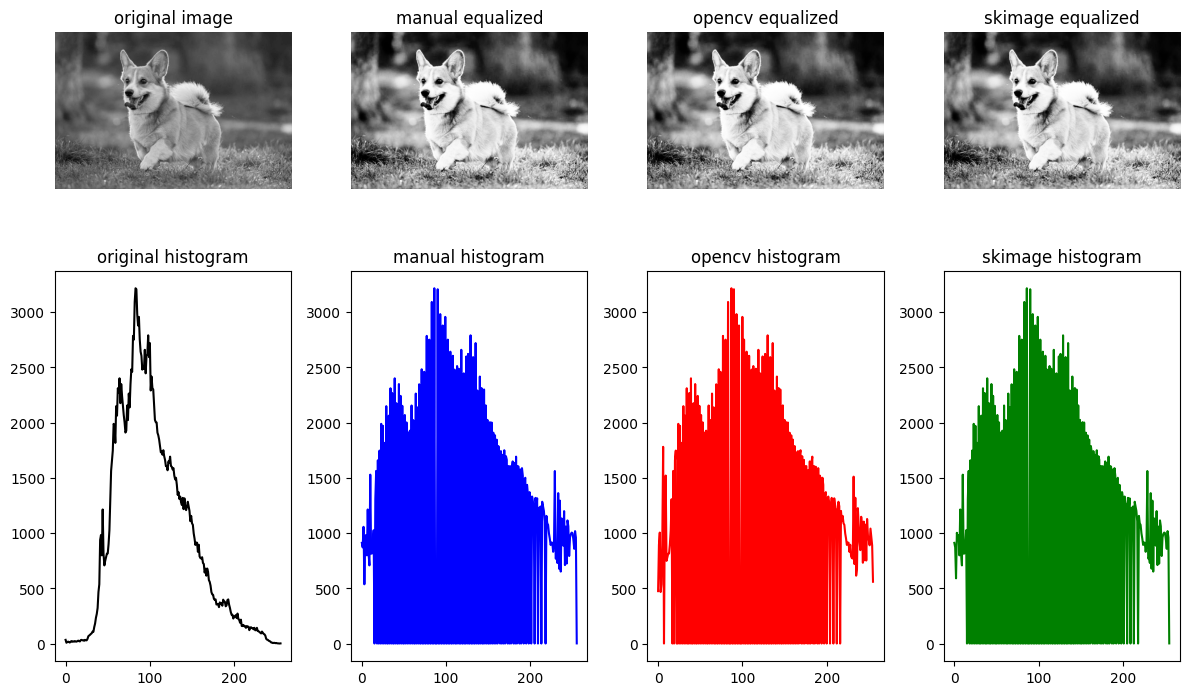

In [4]:
compareHistogramEqualization("img/dog.jpg")

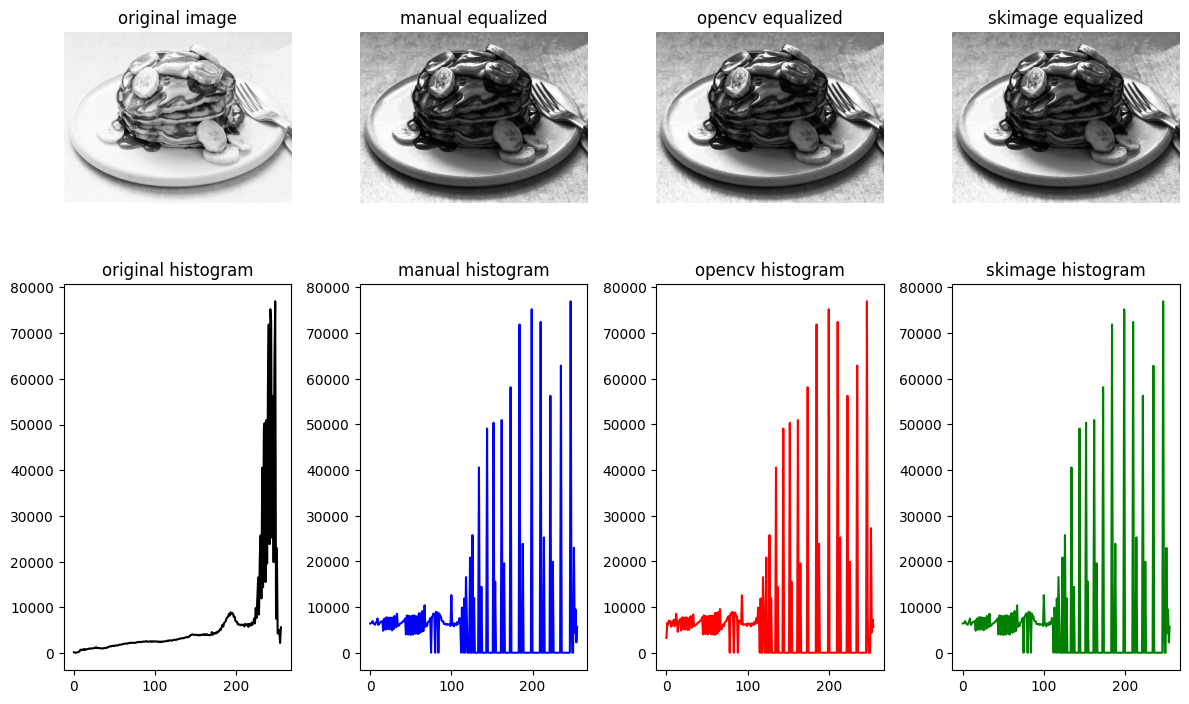

In [5]:
compareHistogramEqualization("img/pancakes.jpg")

## Task 2

## Task 3

## Task 4

## Task 5

## Task 6